# Zadanie 1

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

In [105]:
def emp_kow(X_t, h):
    n = len(X_t)
    mu = np.mean(X_t)
    suma = 0
    for i in range(n-abs(h)):
        suma += (X_t[i]-mu)*(X_t[i+abs(h)] - mu)
    return 1/n*suma

def yule_walker(trajectory,p):
    kow = np.zeros(p)
    gamma = np.zeros((p,p))
    for i in range(0,p):
        kow[i] = emp_kow(trajectory,i+1)
    for i in range(p):
        for j in range(p):
            gamma[i,j] = emp_kow(trajectory,np.abs(i-j))
    phi = np.matmul(np.linalg.inv(gamma),kow.transpose())
    sigma_sqr = emp_kow(trajectory,0) - np.matmul(phi,kow.transpose())
    return phi, sigma_sqr

def simulate_AR(phi,sigma, n = 10000):
    ar_process = ArmaProcess(phi, ma=1)
    return ar_process.generate_sample(nsample = n, scale = np.sqrt(sigma)) 

In [106]:
phi = np.array([1, -0.2, -0.4])
sigma_sqr = 1
n = 1000
m=100

phi1_hat = np.zeros(m)
phi2_hat = np.zeros(m)
sigma_hat = np.zeros(m)

for i in range(m):
    sim_data = simulate_AR(phi,sigma_sqr,n)
    phi_params, sigma_params = yule_walker(sim_data,2)
    phi1_hat[i] =  phi_params[0]
    phi2_hat[i] =  phi_params[1]
    sigma_hat[i] = sigma_params

{'whiskers': [<matplotlib.lines.Line2D at 0x274a55c2030>,
 'caps': [<matplotlib.lines.Line2D at 0x274a55c30e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274a55c2ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x274a55c36b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x274a55c3920>,
 'means': []}

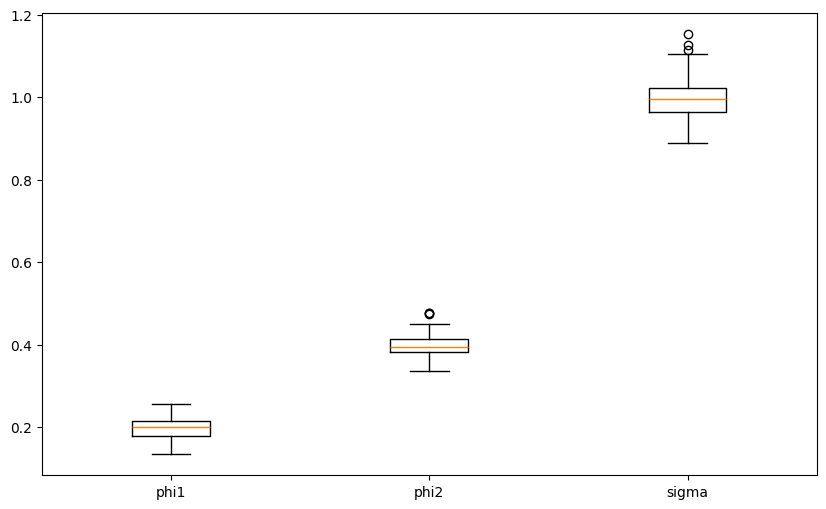

In [107]:
plt.figure(figsize=(10,6))
plt.boxplot([phi1_hat, phi2_hat, sigma_hat],labels=["phi1", "phi2", "sigma"])

# Zadanie 2

In [108]:
def nw_phi(trajectory):
    suma_1 = 0
    suma_2 = 0
    for i in range(1,len(trajectory)):
        suma_1 += trajectory[i]*trajectory[i-1]
        suma_2 += np.power(trajectory[i-1],2)
    return suma_1/suma_2

def nw_sigma(trajectory):
    n = len(trajectory)
    phi = nw_phi(trajectory)
    suma = 0
    for i in range(1,n):
        suma += (trajectory[i] - phi*trajectory[i-1])**2
    return suma/n 

In [109]:
phi1 = 0.1
sigma_sqr = 0.5
n = np.arange(100,1100,100)
m = 100
phi_hat_yw = np.zeros((m,10))
phi_hat_nw = np.zeros((m,10))
sigma_hat_yw = np.zeros((m,10))
sigma_hat_nw = np.zeros((m,10))

for i in range(m):
    for j in range(10):
        sim_data = simulate_AR(phi1,sigma_sqr,n[j])
        phi_params, sigma_params = yule_walker(sim_data,2)
        phi_hat_yw[i,j] =  phi_params[0]
        sigma_hat_yw[i,j] = sigma_params

        phi_hat_nw[i,j] = nw_phi(sim_data)
        sigma_hat_nw[i,j] = nw_sigma(sim_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x274ab394da0>,
 'caps': [<matplotlib.lines.Line2D at 0x274ab395370>,
 'boxes': [<matplotlib.patches.PathPatch at 0x274ab0b00e0>,
 'medians': [<matplotlib.lines.Line2D at 0x274ab3958b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x274ab395b50>,
 'means': []}

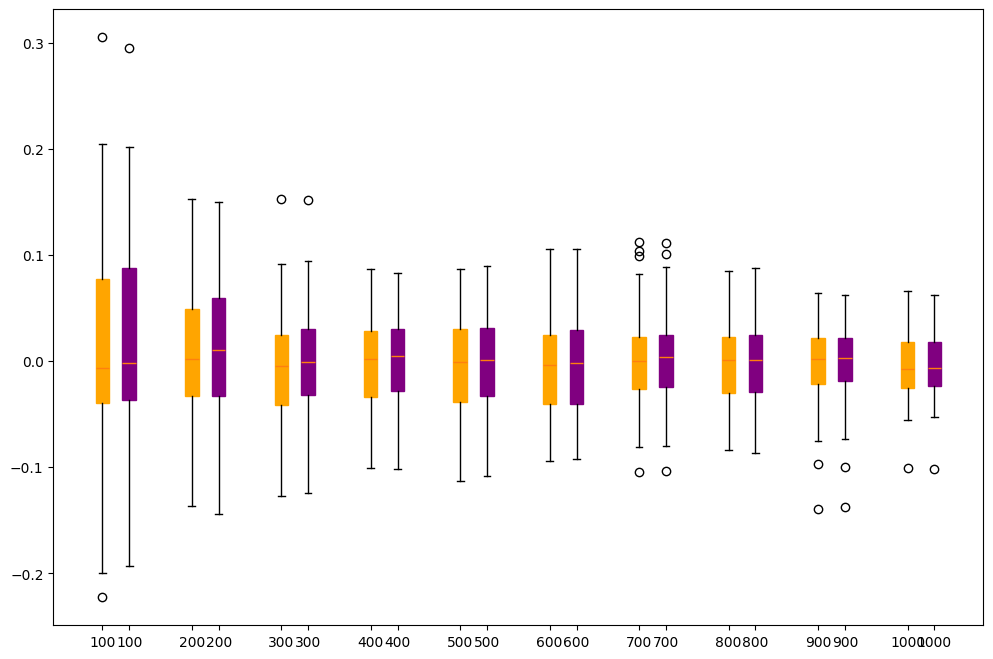

In [128]:
plt.figure(figsize=(12,8))
plt.boxplot(phi_hat_yw,
            labels = n,
            patch_artist=True,
            positions = n-15,
            widths=15, 
            boxprops=dict(facecolor="orange",color = "orange"))
plt.boxplot(phi_hat_nw,
            labels = n,
            patch_artist=True,
            positions = n + 15,
            widths= 15,
            boxprops=dict(facecolor="purple",color = "purple"))

{'whiskers': [<matplotlib.lines.Line2D at 0x274abb9baa0>,
 'caps': [<matplotlib.lines.Line2D at 0x274abb9bf80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x274abb9b770>,
 'medians': [<matplotlib.lines.Line2D at 0x274abbc8530>,
 'fliers': [<matplotlib.lines.Line2D at 0x274abbc8800>,
 'means': []}

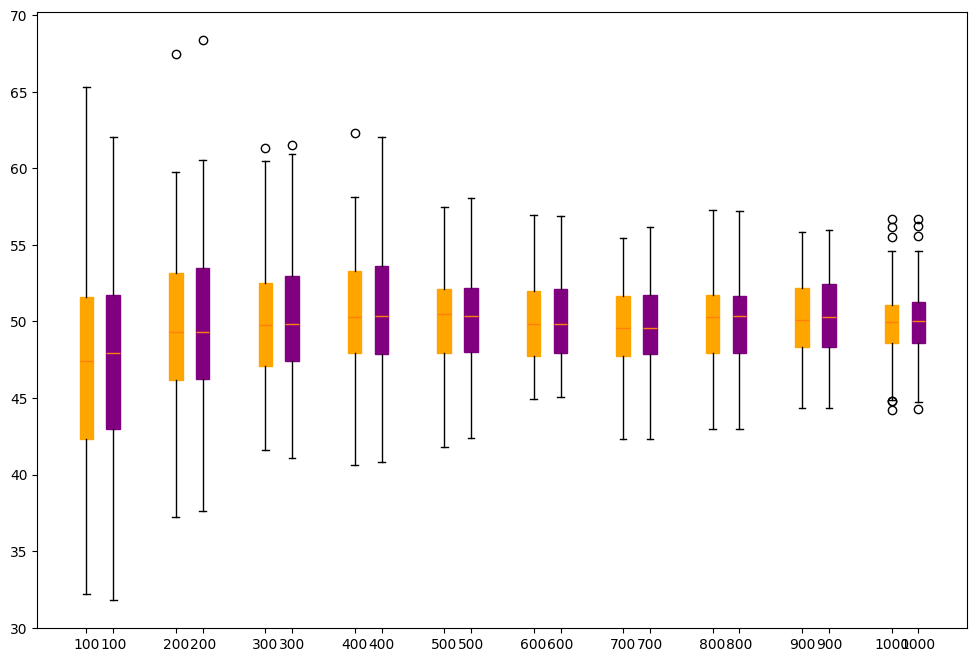

In [130]:
plt.figure(figsize=(12,8))
plt.boxplot(sigma_hat_yw,
            labels = n,
            patch_artist=True,
            positions = n-15,
            widths=15, 
            boxprops=dict(facecolor="orange",color = "orange"))
plt.boxplot(sigma_hat_nw,
            labels = n,
            patch_artist=True,
            positions = n + 15,
            widths= 15,
            boxprops=dict(facecolor="purple",color = "purple"))

# Zadanie 5

In [131]:
phi1 = 0.2
phi2 = 0.4
sigma = 1

n = 50

traj = simulate_AR([phi1, phi2],sigma,n)
p = np.arange(0,11,1)

